# Bishop’s University
## CS 509 – Pattern Recognition
### Full Name: Sara Ahmadi
### Student ID: 002348217
### Full Name: Elaheh Mahmoodi
### Student ID: 002348682

#### 3. Estimation from generated data
A first use on one-dimensional data similar to those used for kernel estimation (note that the GaussianMixture class is available from version 0.18 of Scikit learn, for earlier versions, you should use the GMM class instead).

True
-1.9701098166148139


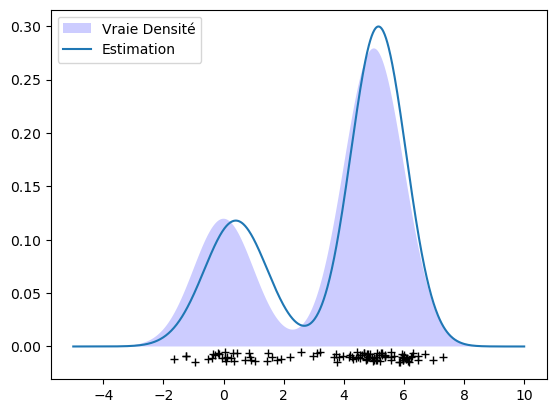

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

# generate the sample
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

# Prepare the data for which we will calculate the density.
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
true_density = (0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

# Gaussian Mixture Model estimation, with the 'correct' number of components.
gmm = GaussianMixture(n_components=2, n_init=3).fit(X)
print(gmm.converged_)
print(gmm.lower_bound_)

# Calculate the density for the data in X_plot
density = np.exp(gmm.score_samples(X_plot))

# Display: true density and estimation
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill_between(X_plot[:, 0], true_density, fc='b', alpha=0.2, label='Vraie Densité')
ax.plot(X_plot[:, 0], density, '-', label="Estimation")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax.legend(loc='upper left')
plt.show()

### Question 1: 
Vary the number of components and visually examine the results. Look at the weights of the components and the means of these components. Investigate how the final value reached by the log-likelihood changes with the number of components.


Number of components: 1
Converged: True
Lower bound (log-likelihood): -2.3414691723805547
Weights: [1.]
Means: [[3.60855653]]


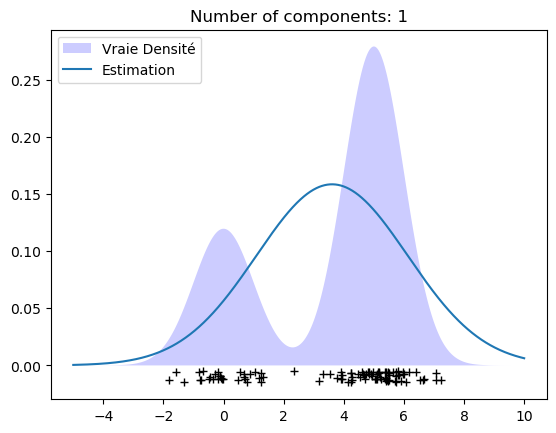


Number of components: 2
Converged: True
Lower bound (log-likelihood): -1.9212519176706888
Weights: [0.69212632 0.30787368]
Means: [[5.17587645]
 [0.08508756]]


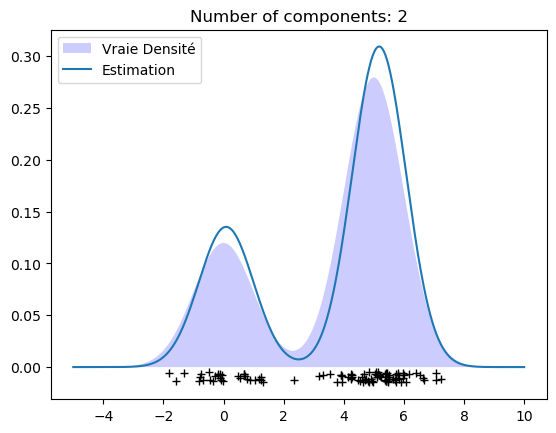


Number of components: 3
Converged: True
Lower bound (log-likelihood): -1.9024714371908855
Weights: [0.10468924 0.70002324 0.19528752]
Means: [[ 0.93401224]
 [ 5.14432272]
 [-0.46275338]]


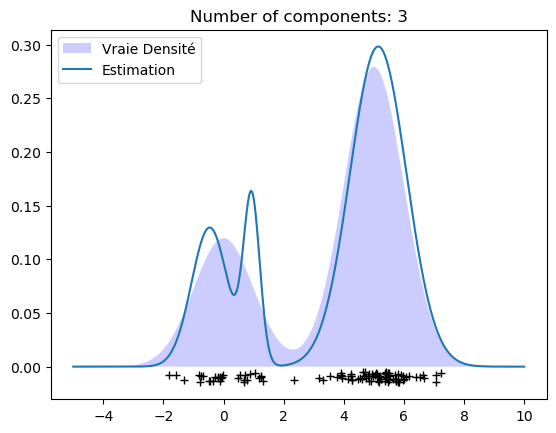


Number of components: 4
Converged: True
Lower bound (log-likelihood): -1.899430423188625
Weights: [0.19748645 0.46417943 0.23588805 0.10244607]
Means: [[-0.44959016]
 [ 5.49294673]
 [ 4.45756185]
 [ 0.9385042 ]]


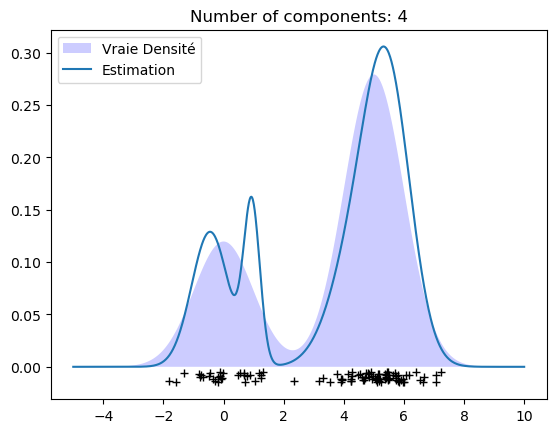

In [2]:
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
true_density = (0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

num_components_list = [1, 2, 3, 4]
for num_components in num_components_list:
    gmm = GaussianMixture(n_components=num_components, n_init=3).fit(X)
    print(f"\nNumber of components: {num_components}")
    print("Converged:", gmm.converged_)
    print("Lower bound (log-likelihood):", gmm.lower_bound_)

    print("Weights:", gmm.weights_)
    print("Means:", gmm.means_)

    density = np.exp(gmm.score_samples(X_plot))

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.fill_between(X_plot[:, 0], true_density, fc='b', alpha=0.2, label='Vraie Densité')
    ax.plot(X_plot[:, 0], density, '-', label="Estimation")
    ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
    ax.legend(loc='upper left')
    plt.title(f'Number of components: {num_components}')
    plt.show()

### Answer 1)
Result:

* As the number of components increases, the log-likelihood generally increases, indicating that the model is better at explaining the data.

* As the number of components increases, the weights become more distributed among them.

* Means indicate the center of each component. The means shift to capture different modes in the data.

The log-likelihood improvement diminishes as the number of components increases, suggesting a diminishing return in model fit.

An application on two-dimensional data:

In [3]:
# Generate the sample
md1 = 1.5 * np.random.randn(200,2) + [3,3]
md2 = np.random.randn(100,2).dot([[2, 0],[0, 0.8]]) + [-3, 3]
md3 = np.random.randn(100,2) + [3,-3]
md = np.concatenate((md1, md2, md3))
# Prepare the data where we will calculate the density
grid_size = 100
Gx = np.arange(-10, 10, 20/grid_size)
Gy = np.arange(-10, 10, 20/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)
# Gaussian Mixture Model estimation
gmm = GaussianMixture(n_components=3,n_init=3).fit(md)
# Calculation of density for grid data
density = np.exp(gmm.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis], (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

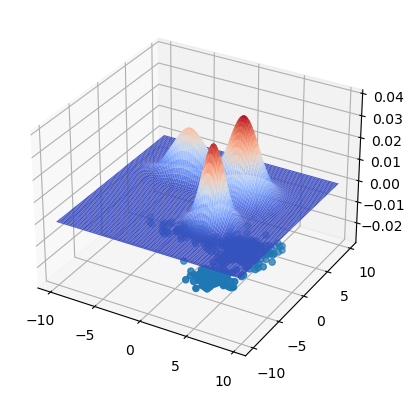

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Display: Data and Estimation
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Gx, Gy, density.reshape(grid_size,grid_size), rstride=1, cstride = 1, cmap = cm.coolwarm, linewidth = 0, antialiased=True)
ax.scatter(md[:,0], md[:,1], -0.025)
plt.show()

### Question 2: 
Vary the number of components and visually examine the results. Explore how the final value of the log-likelihood changes with the number of components.


Number of components: 1
Converged: True
Lower bound (log-likelihood): -4.930544043007151


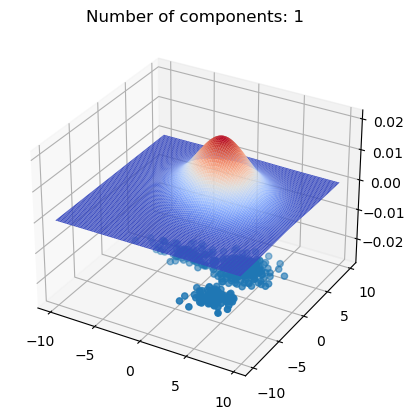


Number of components: 2
Converged: True
Lower bound (log-likelihood): -4.405490787967249


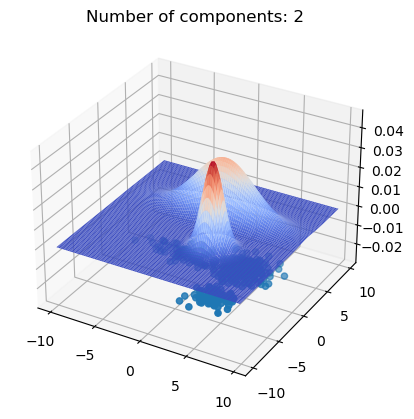


Number of components: 3
Converged: True
Lower bound (log-likelihood): -4.260601957531078


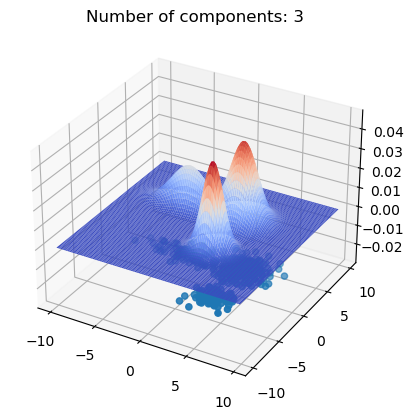


Number of components: 4
Converged: True
Lower bound (log-likelihood): -4.25686296644412


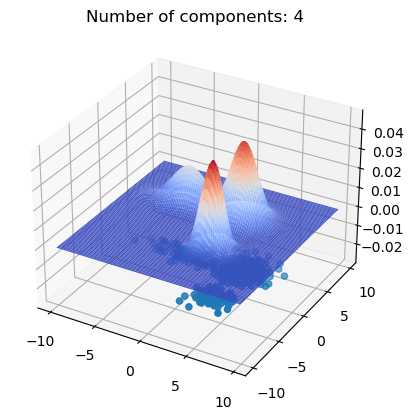

In [129]:
md1 = 1.5 * np.random.randn(200, 2) + [3, 3]
md2 = np.random.randn(100, 2).dot([[2, 0], [0, 0.8]]) + [-3, 3]
md3 = np.random.randn(100, 2) + [3, -3]
md = np.concatenate((md1, md2, md3))

grid_size = 100
Gx = np.arange(-10, 10, 20/grid_size)
Gy = np.arange(-10, 10, 20/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)

num_components_list = [1, 2, 3, 4]
for num_components in num_components_list:
    gmm = GaussianMixture(n_components=num_components, n_init=3).fit(md)
    print(f"\nNumber of components: {num_components}")
    print("Converged:", gmm.converged_)
    print("Lower bound (log-likelihood):", gmm.lower_bound_)

    density = np.exp(gmm.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis], (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(Gx, Gy, density.reshape(grid_size, grid_size), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
    ax.scatter(md[:, 0], md[:, 1], -0.025)
    plt.title(f'Number of components: {num_components}')
    plt.show()

### Answer 2)
As the number of components increases, the log-likelihood generally increases. This indicates that the model is better at explaining the data as the complexity of the model increases.
The log-likelihood seems to plateau or decrease slightly as the number of components goes from 3 to 4. This suggests that there might not be significant additional information gained by adding the fourth component.
It's essential to balance model complexity with the goodness of fit and avoid overfitting.

### Question 3: 
Generate two-dimensional data following a uniform distribution in [0,1]² (two-dimensional data within the unit square). Estimate a Gaussian mixture with 3 components, using n_init=1. Visualize the results. Use the predict method of GaussianMixture to obtain group labels for the data. Apply the modeling followed by group label assignment multiple times and examine the stability of the partitions using the adjusted Rand index, as in the exercises on automatic classification. Be aware that you do not have predefined groups initially; to define reference groups, against which you will compare those resulting from other classifications, you can apply density estimation () followed by group label assignment with predict for the first time. What do you observe?

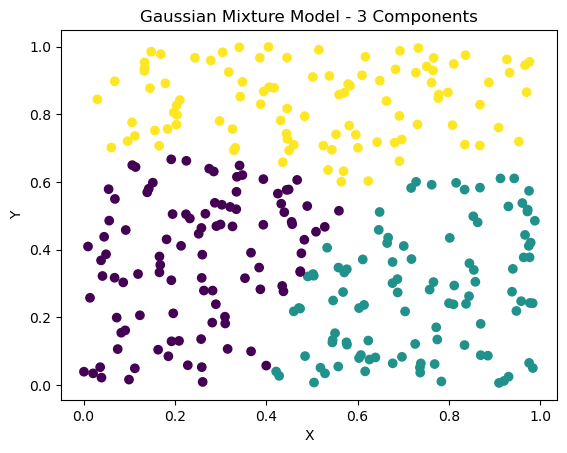

Adjusted Rand Indices for Multiple Trials: [0.311193087058613, 0.838748397166874, 0.838748397166874, 0.9123998476626728, 1.0, 0.8299751851809996, 1.0, 1.0, 1.0, 0.3149035988287728]


In [95]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt

data = np.random.rand(300, 2)

gmm = GaussianMixture(n_components=3, n_init=1)
labels = gmm.fit_predict(data)

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title("Gaussian Mixture Model - 3 Components")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

reference_labels = labels

In [96]:
n_iterations = 10 
rand_indices = []

for i in range(n_iterations):
    new_gmm = GaussianMixture(n_components=3, n_init=1)
    new_labels = new_gmm.fit_predict(data)
    rand_index = adjusted_rand_score(reference_labels, new_labels)
    rand_indices.append(rand_index)

print("Adjusted Rand Indices for Multiple Trials:", rand_indices)

Adjusted Rand Indices for Multiple Trials: [1.0, 1.0, 0.3149035988287728, 0.838748397166874, 1.0, 0.3149035988287728, 0.838748397166874, 0.26195695554147225, 1.0, 0.8936337213707434]


### Answer 3)

In some of our trials (for example the first, second, fifth, and ninth trials ), we achieved a perfect adjusted Rand index of 1.0. This suggests that the clustering results from these trials are identical to the reference clustering.

In other trials, we have adjusted Rand indices less than 1.0, indicating some level of disagreement with the reference clustering. For example, the third trial has an index of 0.3149, and the eighth trial has an index of 0.2619. These values suggest that the clustering results from these trials are less similar to the reference.

Some trials, like the fourth and tenth trials, have relatively high adjusted Rand indices (0.8387 and 0.8936, respectively). This indicates a good agreement between the clustering results from these trials and the reference clustering.

#### Explanation: 
The perfect adjusted Rand indices suggest that the clustering results are highly stable across multiple runs. 

In other words, the Gaussian Mixture Model consistently identifies the same clusters in different trials. This high stability might be due to the simplicity of the dataset, which follows a uniform distribution in a 2D square. The uniformity of the distribution makes it easier for the model to identify the underlying clusters. 

The adjusted Rand index is a measure of the similarity between two sets of labels.

#### Conclusion:
he Gaussian Mixture Model with 3 components performs well on this specific dataset, and the clustering results are robust and stable across multiple runs.

### 4. Choosing the number of components and the type of covariance matrix for the generated data

To choose the number of components in the mixture, we will first compare the AIC and BIC criteria using 'full' covariance matrices (by default). This will be done on the generated two-dimensional data.

AIC : [3983.7950451716592, 3593.6886524203096, 3461.2662757821577, 3462.698306419189, 3463.724191504155, 3467.103378459608, 3473.174671288839, 3486.6089067879575]
BIC : [4003.752367907199, 3637.5947624384976, 3529.121173082993, 3554.5019910026726, 3579.4766633702866, 3606.804637608387, 3636.824717720266, 3674.2077405020327]


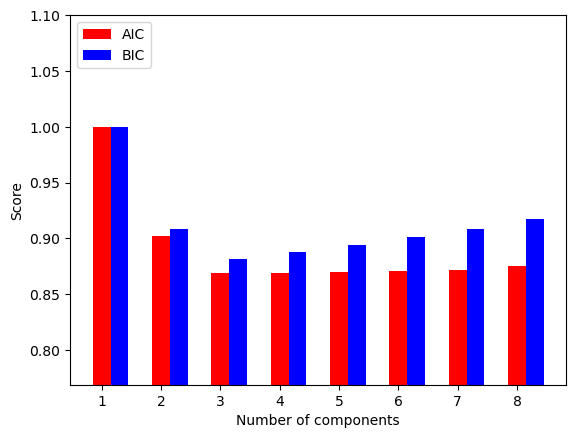

In [7]:
n_max = 8 # number of values for n_components
n_components_range = np.arange(n_max)+1
aic = []
bic = []
# Model construction and criteria calculation
for n_comp in n_components_range:
    gmm = GaussianMixture(n_components=n_comp).fit(md)
    aic.append(gmm.aic(md))
    bic.append(gmm.bic(md))
    
print("AIC : " + str(aic))
print("BIC : " + str(bic))

# Normalization of the results obtained for the criteria
raic = aic/np.max(aic)
rbic = bic/np.max(bic)

# bar chart display
xpos = np.arange(n_max)+1 # location of bar chart
width = 0.3    # width of bar chart
fig = plt.figure()
plt.ylim([min(np.concatenate((rbic,raic)))-0.1, 1.1])
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.bar(xpos, raic, width, color='r', label="AIC")
plt.bar(xpos+width, rbic, width, color='b', label="BIC")
plt.legend(loc='upper left')
plt.show()

For these data and with 'full' covariance matrices, both AIC and BIC favor the use of 3 components, a number equal to that of normal distributions that were used to generate the data.

### Question 4: 
Perform the same comparison for these data with covariance matrices 'diag'. Plot, on the same (adjusted) graphics, the normalized values of the final log-likelihood for each value of n_components.

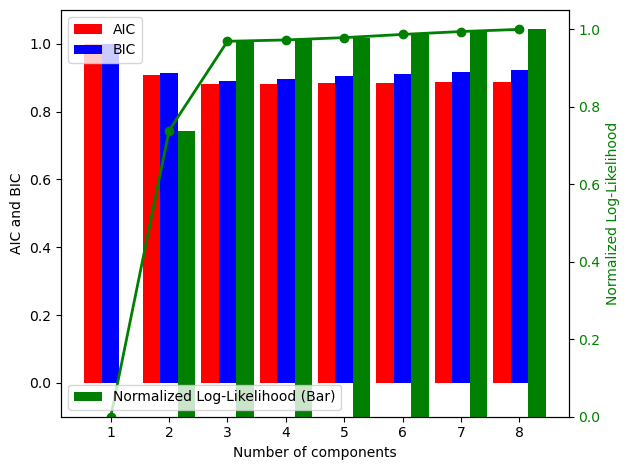

In [127]:
n_max = 8
n_components_range = np.arange(n_max) + 1

aic_diag = []
bic_diag = []
normalized_log_likelihood = []

for n_comp in n_components_range:
    gmm_diag = GaussianMixture(n_components=n_comp, covariance_type='diag').fit(md)
    aic_diag.append(gmm_diag.aic(md))
    bic_diag.append(gmm_diag.bic(md))
    normalized_log_likelihood.append(gmm_diag.score(md) / len(md))

raic_diag = aic_diag / np.max(aic_diag)
rbic_diag = bic_diag / np.max(bic_diag)
rlog_likelihood = (normalized_log_likelihood - np.min(normalized_log_likelihood)) / (np.max(normalized_log_likelihood) - np.min(normalized_log_likelihood))

xpos = np.arange(n_max) + 1
width = 0.3

fig, ax1 = plt.subplots()

ax1.set_ylim([min(np.concatenate((rbic_diag, raic_diag, rlog_likelihood))) - 0.1, 1.1])
ax1.set_xlabel('Number of components')
ax1.set_ylabel('AIC and BIC', color='black')

ax1.bar(xpos - width, raic_diag, width, color='r', label="AIC")
ax1.bar(xpos, rbic_diag, width, color='b', label="BIC")
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Normalized Log-Likelihood', color='green')
ax2.bar(xpos + width, rlog_likelihood, width, color='g', label='Normalized Log-Likelihood (Bar)')
ax2.plot(xpos, rlog_likelihood, color='green', marker='o', linestyle='-', linewidth=2, label='')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='lower left')

fig.tight_layout()
plt.show()


### 5. Estimation from the 'textures' data

We will apply Gaussian mixture density estimation to the 'textures' data projected onto the first two principal axes. Afterwards, we perform data analysis :

In [12]:
# Reading the data and applying Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

textures = np.loadtxt('texture.dat')
pca = PCA().fit(textures[:,:40])
texturesp = pca.transform(textures[:,:40])

# Construction of the mixture model, verifications
gmm = GaussianMixture(n_components=11,n_init=3).fit(texturesp[:,:2])

print(gmm.converged_)
# True
print(gmm.n_iter_)
# 10
print(gmm.lower_bound_)
# -1.7780023505669722

# Prepare the data where the density will be calculated
grid_size = 100
xmin = 1.3*np.min(texturesp[:,0])
xmax = 1.3*np.max(texturesp[:,0])
Gx = np.arange(xmin, xmax, (xmax-xmin)/grid_size)
ymin = 1.3*np.min(texturesp[:,1])
ymax = 1.3*np.max(texturesp[:,1])
Gy = np.arange(ymin, ymax, (ymax-ymin)/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)

# Calculation of the density for grid data
density = np.exp(gmm.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis],(Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

True
10
-1.776663935654622


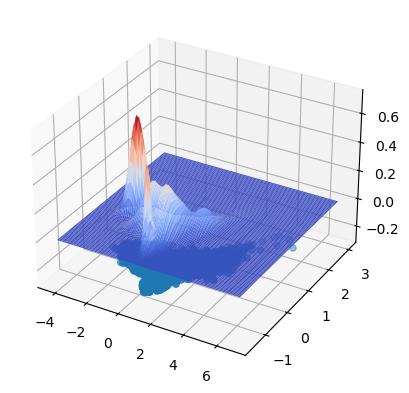

In [97]:
# presentation of results
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Gx, Gy, density.reshape(grid_size,grid_size), rstride=1,
cstride=1, cmap=cm.coolwarm, linewidth=0,
antialiased=True)
ax.scatter(texturesp[:,0], texturesp[:,1], -0.25)
plt.show()

### Question 5: 
Apply Gaussian mixture density estimation to the 'textures' data projected onto the first two discriminant axes. (Hint: use LDA instead of PCA)

Converged:  True
n_iter:  5
Lower Bound:  -4.6385094223033345


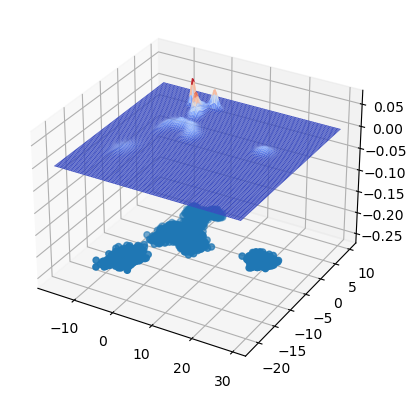

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

textures = np.loadtxt('texture.dat')
lda = LinearDiscriminantAnalysis(n_components=2)
textures_lda = lda.fit_transform(textures[:, :40], textures[:, 40])

gmm_lda = GaussianMixture(n_components=11, n_init=3).fit(textures_lda)

print("Converged: ",gmm_lda.converged_)
print("n_iter: ", gmm_lda.n_iter_)
print("Lower Bound: ", gmm_lda.lower_bound_)

grid_size = 100
xmin = 1.3 * np.min(textures_lda[:, 0])
xmax = 1.3 * np.max(textures_lda[:, 0])
Gx = np.arange(xmin, xmax, (xmax - xmin) / grid_size)
ymin = 1.3 * np.min(textures_lda[:, 1])
ymax = 1.3 * np.max(textures_lda[:, 1])
Gy = np.arange(ymin, ymax, (ymax - ymin) / grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)

density_lda = np.exp(gmm_lda.score_samples(np.hstack(((Gx.reshape(grid_size * grid_size))[:, np.newaxis],
                                                       (Gy.reshape(grid_size * grid_size)[:, np.newaxis])))))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Gx, Gy, density_lda.reshape(grid_size, grid_size), rstride=1,
                cstride=1, cmap=cm.coolwarm, linewidth=0,
                antialiased=True)
ax.scatter(textures_lda[:, 0], textures_lda[:, 1], -0.25)
plt.show()
